In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
imageFileName = 'IMG_0858.pgm'
#imageFileName='./Test_Images/Non_Defiltered.pgm'

In [3]:
rawImage = cv2.imread(imageFileName, flags=cv2.IMREAD_GRAYSCALE | cv2.IMREAD_IGNORE_ORIENTATION | cv2.IMREAD_ANYDEPTH)
BGR_image = cv2.cvtColor(rawImage, cv2.COLOR_BayerBG2BGR)

In [27]:
BGR_image = cv2.imread('NGC7000.tif', flags=cv2.IMREAD_ANYCOLOR | cv2.IMREAD_IGNORE_ORIENTATION | cv2.IMREAD_ANYDEPTH)

In [28]:
rawImage

array([[9912, 4044, 8490, ..., 2285, 5244, 1662],
       [3808, 2481, 4425, ..., 1834, 1534, 1300],
       [8866, 3411, 6599, ..., 1180, 5432, 3207],
       ..., 
       [5942, 3095, 6103, ..., 2317, 6022, 2644],
       [3577, 1955, 3256, ..., 2000, 3524, 1857],
       [7390, 3476, 7766, ..., 2210, 7310, 2365]], dtype=uint16)

In [29]:
#cv2.imwrite('image.tif', BGR_image)

In [30]:
BGR_image

array([[[ 4639,  6827,  9020],
        [ 5630,  8323, 10942],
        [ 6529,  9826, 12577],
        ..., 
        [ 6981, 10139, 12202],
        [ 6214,  8554, 10802],
        [ 5472,  7394,  9303]],

       [[ 5094,  7318,  9715],
        [ 6409,  9387, 12310],
        [ 7307, 10905, 13914],
        ..., 
        [ 6988, 10119, 12154],
        [ 6184,  8546, 10759],
        [ 5408,  7462,  9281]],

       [[ 5026,  7189,  9455],
        [ 6380,  9378, 12061],
        [ 7310, 10959, 13915],
        ..., 
        [ 6848, 10159, 11897],
        [ 5927,  8760, 10509],
        [ 5094,  7720,  9075]],

       ..., 
       [[ 4629,  6624,  8326],
        [ 6530,  9345, 11538],
        [ 7193, 10294, 12613],
        ..., 
        [ 7441, 10360, 12532],
        [ 6764,  9062, 11226],
        [ 5513,  7343,  9111]],

       [[ 4771,  6873,  8218],
        [ 6660,  9612, 11504],
        [ 6982,  9938, 12051],
        ..., 
        [ 7426, 10376, 12638],
        [ 6674,  9248, 11290],
        [ 

In [31]:
blue, green, red = cv2.split(BGR_image)

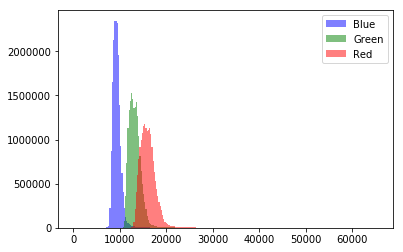

In [32]:
bins = np.linspace(0, 65535, 255)

plt.hist(blue.flatten(), bins, alpha=0.5, color='blue', label='Blue')
plt.hist(green.flatten(), bins, alpha=0.5, color='green', label='Green')
plt.hist(red.flatten(), bins, alpha=0.5, color='red', label='Red')

plt.legend(loc='upper right')
plt.show()

In [33]:
blueMean = blue.mean()
greenMean = green.mean()
redMean = red.mean()

overallMean = (blueMean + greenMean + redMean ) / 3

print('Mean:\n\tBlue: {}\n\tGreen: {}\n\tRed: {}'.format(blueMean, greenMean, redMean))
print('Overall mean: {}'.format(overallMean))

Mean:
	Blue: 9353.711388726613
	Green: 13267.11090739326
	Red: 16063.086844553627
Overall mean: 12894.636380224501


In [34]:
newBlue = blue + (overallMean - blueMean)
newGreen = green + (overallMean - greenMean)
newRed = red + (overallMean - redMean)

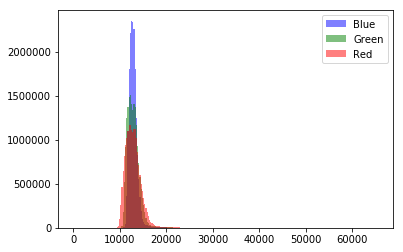

In [35]:
bins = np.linspace(0, 65535, 255)

plt.hist(newBlue.flatten(), bins, alpha=0.5, color='blue', label='Blue')
plt.hist(newGreen.flatten(), bins, alpha=0.5, color='green', label='Green')
plt.hist(newRed.flatten(), bins, alpha=0.5, color='red', label='Red')

plt.legend(loc='upper right')
plt.show()

In [36]:
newBlue_df = pd.DataFrame(newBlue)
newGreen_df = pd.DataFrame(newGreen)
newRed_df = pd.DataFrame(newRed)

In [37]:
newRed_df.min().min()

2759.5495356708743

In [38]:
def cut(e):
    if e < 0:
        return 0
    elif e > 65535:
        return 65535
    else:
        return e

def cutRow(r):
    vfunc = np.vectorize(cut)
    r = vfunc(r)
    return r

newBlue_cut = newBlue_df.apply(cutRow).values
newGreen_cut = newGreen_df.apply(cutRow).values
newRed_cut = newRed_df.apply(cutRow).values

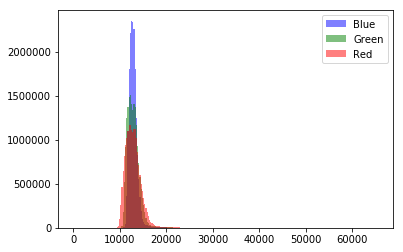

In [39]:
bins = np.linspace(0, 65535, 255)

plt.hist(newBlue_cut.flatten(), bins, alpha=0.5, color='blue', label='Blue')
plt.hist(newGreen_cut.flatten(), bins, alpha=0.5, color='green', label='Green')
plt.hist(newRed_cut.flatten(), bins, alpha=0.5, color='red', label='Red')

plt.legend(loc='upper right')
plt.show()

In [40]:
newGreen_cut.max()

62084.525472831243

In [41]:
newImage = cv2.merge((newBlue_cut, newGreen_cut, newRed_cut))

In [42]:
#newImage = cv2.merge((newBlue, newGreen, newRed))

In [43]:
newImage16 = newImage.astype(np.uint16, copy=False)

In [44]:
newImage16.max()

62084

In [45]:
cv2.imwrite('image.tif', newImage16)

True